# DCS 540 Data Preparation (DSC540-T301 2225-1)
## Bellevue University
## Project: Milestone 4
## Author: Jake Meyer
## Date: 5/21/2022

### Milestone 4: Connecting to an API/Pulling in the Data and Cleaning/Formatting
API source listed below:
[ArcGIS API](https://developers.arcgis.com/python/api-reference/)

Original Milestone Link from Milestone 1:
[USA Major Cities](https://hub.arcgis.com/datasets/esri::usa-major-cities/about)

In [301]:
'''
Install ArcGis API for Python module called arcgis. 
Based on documentation found for the API source listed above.
'''
# pip install arcgis

'\nInstall ArcGis API for Python module called arcgis. \nBased on documentation found for the API source listed above.\n'

In [508]:
'''
Import the necessary libraries to transform and/or clean the data from ArcGIS API.
''' 
import numpy as np

import pandas as pd
   
from bs4 import BeautifulSoup

import requests

from arcgis.gis import GIS

import matplotlib.pyplot as plt

In [509]:
'''
Test the install with Jupyter notebook by generating a map of the United States.
ArcGIS API for python will be stored under my_gis.
'''
my_gis=GIS()
my_map=my_gis.map()

In [510]:
'''
Import arcgis.
'''
import arcgis

In [511]:
'''
Search for theUSA Major Cities package within ArcGIS to identify
'''
data_search = my_gis.content.search("USA Major Cities")
data_search[1]

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>

In [512]:
'''
Obtain the ID of the USA Major Cities data of interest.
'''
data_search[1].id

'85d0ca4ea1ca4b9abf0c51b9bd34de2e'

In [513]:
'''
Show the city data plotted on a MAP of the United States. The data applies to cities with populations of 10,000 people or more,
state capitals, and national capital.
'''
city_data = my_gis.content.get(data_search[1].id)
my_map.add_layer(city_data)
my_map

MapView(layout=Layout(height='400px', width='100%'))

In [514]:
'''
Use the .query() function to access the data within the city layer.
Store the city data under the variable city_data_content.
'''
city_data_content = city_data.layers[0].query()

In [515]:
'''
Create a DataFrame with the city_data_content variable by using .sdf.
The .sdf will store the data in a pandas DataFrame per the API documentation.
'''
city_df = city_data_content.sdf

In [516]:
'''
View the city_df shape for rows and columns initially pulled from the API.
'''
city_df.shape

(3886, 50)

In [517]:
'''
The shape matches the table rows and columns available from teh original source of inteterest in Milestone 1.
Understand the initial columns for the city_df DataFrame.
'''
city_df.columns

Index(['FID', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIPS', 'CAPITAL',
       'POP_CLASS', 'POPULATION', 'POP2010', 'WHITE', 'BLACK', 'AMERI_ES',
       'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES',
       'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES',
       'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'SHAPE'],
      dtype='object')

In [518]:
'''
View the city_df DataFrame first five rows.
'''
city_df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,3,Boise City,city,ID,16,1608830,State,8,225405,205671,...,21233,2414,5919,50647,2.97,92700,6996,52345,33359,"{""x"": -12938676.6836459, ""y"": 5403597.04949123..."
3,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
4,5,Caldwell,city,ID,16,1612250,,7,53942,46237,...,3113,686,1755,10776,3.51,16323,1428,9699,5196,"{""x"": -12989383.674504515, ""y"": 5413226.487333..."


## Perform data transformation and/or cleansing steps

### Data Transformation and/or Cleansing Step 1:
Remove the whitespace present in the 'NAME' column for each city. This step will help when filtering the DataFrame based on the top 150 cities from Milestone 2. 

In [519]:
'''
Use .str.strip() to remove the whitespace in'NAME' and 'ST' columns.
'''
city_df['NAME'] = city_df['NAME'].str.strip()
city_df['ST'] = city_df['ST'].str.strip()

### Data Transformation and/or Cleansing Step 2:
Create an additional column for city_df which will include the city with a "-" and the state abbreviation. This will help provide a convenient way to filter the DataFrame for the top 150 cities while handling duplicate city names.

In [520]:
'''
Add a column called city-state which will include a combined name for city and state with a "-".
'''
city_df['city-state'] = city_df['NAME']+"-"+city_df['ST']

In [521]:
'''
Show that 'city-state' column was successfully added to the DataFrame. There will now be 51 columns.
'''
city_df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE,city-state
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080...",Ammon-ID
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529...",Blackfoot-ID
2,3,Boise City,city,ID,16,1608830,State,8,225405,205671,...,2414,5919,50647,2.97,92700,6996,52345,33359,"{""x"": -12938676.6836459, ""y"": 5403597.04949123...",Boise City-ID
3,4,Burley,city,ID,16,1611260,,6,10727,10345,...,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606...",Burley-ID
4,5,Caldwell,city,ID,16,1612250,,7,53942,46237,...,686,1755,10776,3.51,16323,1428,9699,5196,"{""x"": -12989383.674504515, ""y"": 5413226.487333...",Caldwell-ID


### Data Transformation and/or Cleansing Step 3:
Filter the DataFrame based on the top 150 cities from Milestone 2. This will involve creating a list from the final DataFrame produced from Milestone 2 for the top 150 cities. 

In [522]:
'''
Move a copy of the final DataFrame produced in Milestone 2 into the working directory for this notebook. 
The df_final from Milestone 2 was renamed df_final_milestone2.csv.
The city names were stripped down to just the name without any state abbreviations.
Begin by reading the csv file for milestone 2 with pd.read_csv.
Create a dictionary which includes the top 150 cities listed in US News Report.
'''
df_final_milestone2 = pd.read_csv("df_final_milestone2.csv")

In [523]:
'''
Understand the shape of the DataFrame.
'''
df_final_milestone2.shape

(150, 10)

In [526]:
'''
Use list() and zip() to create a tupled list of city and state abbreviation.
Eliminated the whitespace from the State abbreviations straight from the CSV file.
Create a list of the top 150 cities with the corresponding state abbreviation to help filter the DataFrame.
'''
my_list = list(zip(df_final_milestone2['city'], df_final_milestone2['state']))

In [527]:
'''
Show my_list to ensure the city and state abbreviations are stored correctly as tupled pairs.
'''
my_list

[('Boulder', 'CO'),
 ('Raleigh', 'NC'),
 ('Huntsville', 'AL'),
 ('Fayetteville', 'AR'),
 ('Austin', 'TX'),
 ('Colorado Springs', 'CO'),
 ('Naples', 'FL'),
 ('Portland', 'ME'),
 ('Sarasota', 'FL'),
 ('Portland', 'OR'),
 ('Boise City', 'ID'),
 ('Ann Arbor', 'MI'),
 ('Des Moines', 'IA'),
 ('Denver', 'CO'),
 ('San Francisco', 'CA'),
 ('Madison', 'WI'),
 ('Fort Collins', 'CO'),
 ('Melbourne', 'FL'),
 ('Seattle', 'WA'),
 ('Charlotte', 'NC'),
 ('Green Bay', 'WI'),
 ('Jacksonville', 'FL'),
 ('Salt Lake City', 'UT'),
 ('Spartanburg', 'SC'),
 ('Omaha', 'NE'),
 ('Pensacola', 'FL'),
 ('Minneapolis', 'MN'),
 ('Washington', 'DC'),
 ('Lincoln', 'NE'),
 ('Nashville', 'TN'),
 ('Boston', 'MA'),
 ('Tampa', 'FL'),
 ('Lexington', 'KY'),
 ('Grand Rapids', 'MI'),
 ('Myrtle Beach', 'SC'),
 ('San Jose', 'CA'),
 ('Dallas', 'TX'),
 ('Greenville', 'SC'),
 ('Houston', 'TX'),
 ('Phoenix', 'AZ'),
 ('Knoxville', 'TN'),
 ('Charleston', 'SC'),
 ('Fort Myers', 'FL'),
 ('Cincinnati', 'OH'),
 ('Albany', 'NY'),
 ('Winston-

In [528]:
'''
Print the length of my_list.
'''
len(my_list)

150

In [529]:
'''
Create a list called city_state_list that contains the top 150 city-state combinations.
'''
city_state_list = []
for key,value in my_list:
    city_state_list.append(key + '-' + value)
city_state_list

['Boulder-CO',
 'Raleigh-NC',
 'Huntsville-AL',
 'Fayetteville-AR',
 'Austin-TX',
 'Colorado Springs-CO',
 'Naples-FL',
 'Portland-ME',
 'Sarasota-FL',
 'Portland-OR',
 'Boise City-ID',
 'Ann Arbor-MI',
 'Des Moines-IA',
 'Denver-CO',
 'San Francisco-CA',
 'Madison-WI',
 'Fort Collins-CO',
 'Melbourne-FL',
 'Seattle-WA',
 'Charlotte-NC',
 'Green Bay-WI',
 'Jacksonville-FL',
 'Salt Lake City-UT',
 'Spartanburg-SC',
 'Omaha-NE',
 'Pensacola-FL',
 'Minneapolis-MN',
 'Washington-DC',
 'Lincoln-NE',
 'Nashville-TN',
 'Boston-MA',
 'Tampa-FL',
 'Lexington-KY',
 'Grand Rapids-MI',
 'Myrtle Beach-SC',
 'San Jose-CA',
 'Dallas-TX',
 'Greenville-SC',
 'Houston-TX',
 'Phoenix-AZ',
 'Knoxville-TN',
 'Charleston-SC',
 'Fort Myers-FL',
 'Cincinnati-OH',
 'Albany-NY',
 'Winston-Salem-NC',
 'Port St. Lucie-FL',
 'Asheville-NC',
 'Chattanooga-TN',
 'Richmond-VA',
 'Kalamazoo-MI',
 'Hickory-NC',
 'Hartford-CT',
 'Columbia-SC',
 'Atlanta-GA',
 'Reno-NV',
 'Kansas City-MO',
 'Ocala-FL',
 'Columbus-OH',
 '

In [530]:
'''
Check the length of the city_state_list to ensure there are 150 cities.
'''
len(city_state_list)

150

In [531]:
df_final = city_df[city_df['city-state'].isin(city_state_list)]

In [532]:
df_final.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE,city-state
2,3,Boise City,city,ID,16,1608830,State,8,225405,205671,...,2414,5919,50647,2.97,92700,6996,52345,33359,"{""x"": -12938676.6836459, ""y"": 5403597.04949123...",Boise City-ID
62,63,Chicago,city,IL,17,1714000,,10,2781116,2695598,...,28332,116555,576793,3.40,1194337,148777,469562,575998,"{""x"": -9756835.705284344, ""y"": 5124572.0445172...",Chicago-IL
182,183,Peoria,city,IL,17,1759000,,8,116343,115007,...,1065,5775,27353,3.06,52621,5469,27349,19803,"{""x"": -9973119.96631685, ""y"": 4966943.94268674...",Peoria-IL
194,195,Rockford,city,IL,17,1765000,,8,150027,152871,...,2013,7634,37044,3.14,66700,6727,34998,24975,"{""x"": -9914287.199988268, ""y"": 5200447.4284772...",Rockford-IL
264,265,Fort Wayne,city,IN,18,1825000,,8,263854,253691,...,3113,10853,63001,3.09,113541,11956,64291,37294,"{""x"": -9478144.565630203, ""y"": 5025404.7988688...",Fort Wayne-IN


In [533]:
'''
Understand the shape of df_final to see the number of rows and columns.
'''
df_final.shape

(149, 51)

In [534]:
'''
Print out the 'city-state' combination to view any missing from the list of 150.
Also, provides the opportunity to review with the original list for any city naming anomolies.
Compare with the ArcGIS filter site for any differences.
For example, New York City vs. New York.
'''
for l in df_final['city-state']:
    print(l)

Boise City-ID
Chicago-IL
Peoria-IL
Rockford-IL
Fort Wayne-IN
Indianapolis-IN
South Bend-IN
Davenport-IA
Des Moines-IA
Wichita-KS
Los Angeles-CA
Modesto-CA
Sacramento-CA
Salinas-CA
San Diego-CA
San Francisco-CA
San Jose-CA
Santa Barbara-CA
Santa Rosa-CA
Stockton-CA
Vallejo-CA
Visalia-CA
Boulder-CO
Colorado Springs-CO
Denver-CO
Fort Collins-CO
Hartford-CT
New Haven-CT
Washington-DC
Birmingham-AL
Huntsville-AL
Mobile-AL
Montgomery-AL
Anchorage-AK
Phoenix-AZ
Tucson-AZ
Fayetteville-AR
Little Rock-AR
Bakersfield-CA
Fresno-CA
Lexington-KY
Louisville-KY
Baton Rouge-LA
Lafayette-LA
New Orleans-LA
Shreveport-LA
Portland-ME
Baltimore-MD
Salisbury-MD
Boston-MA
Springfield-MA
Worcester-MA
Ann Arbor-MI
Detroit-MI
Flint-MI
Grand Rapids-MI
Kalamazoo-MI
Lansing-MI
Daytona Beach-FL
Fort Myers-FL
Jacksonville-FL
Lakeland-FL
Melbourne-FL
Miami-FL
Naples-FL
Ocala-FL
Orlando-FL
Pensacola-FL
Port St. Lucie-FL
Sarasota-FL
Tallahassee-FL
Tampa-FL
Atlanta-GA
Augusta-GA
Savannah-GA
Honolulu-HI
Trenton-NJ
Albuque

### Data Transformation and/or Cleansing Step 3:
Remove non-essential columns. The columns that will be retained will be population columns, ethnicity/race counts, family count/size, and housing data.  

In [535]:
'''
Create a list of essential columns to include in df_final.
Columns removed from the Data Frame are:
'FID', 'CLASS', 'POP_CLASS', 'MED_AGE_M', 'MED_AGE_F', 'STFIPS', 'PLACEFIPS',
'CAPITAL', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C',
'MHH_CHILD', 'FHH_CHILD', 'SHAPE', and 'city-state'.
'''
essential_columns = ['NAME', 'ST', 'POPULATION', 'POP2010', 'WHITE', 'BLACK', 'AMERI_ES',
                     'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES',
                     'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
                     'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
                     'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'HOUSEHOLDS',
                     'AVE_HH_SZ', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT',
                     'OWNER_OCC', 'RENTER_OCC']

In [536]:
'''
Create the df_final DataFrame consisting of only essential columns.
'''
df_final=df_final[essential_columns]

In [537]:
'''
View the df_final DataFrame to check the revised columns. 
'''
df_final.head()

,NAME,ST,POPULATION,POP2010,WHITE,BLACK,AMERI_ES,ASIAN,HAWN_PI,HISPANIC,...,AGE_85_UP,MED_AGE,HOUSEHOLDS,AVE_HH_SZ,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC
2,Boise City,ID,225405,205671,182991,3043,1404,6501,457,14606,...,3690,35.3,85704,2.36,50647,2.97,92700,6996,52345,33359
62,Chicago,IL,2781116,2695598,1212835,887608,13337,147164,1013,778862,...,37033,33.1,1045560,2.52,576793,3.40,1194337,148777,469562,575998
182,Peoria,IL,116343,115007,71740,30991,360,5240,29,5628,...,2691,34.0,47152,2.36,27353,3.06,52621,5469,27349,19803
194,Rockford,IL,150027,152871,99517,31359,614,4443,41,24085,...,3970,35.8,59973,2.48,37044,3.14,66700,6727,34998,24975
264,Fort Wayne,IN,263854,253691,186763,39085,939,8379,154,20200,...,4806,34.5,101585,2.44,63001,3.09,113541,11956,64291,37294


### Data Transformation and/or Cleansing Step 4:
Rename the column headers. The headers will be renamed to clarify the data contained within each column. 

In [538]:
'''
Create a list of column names for df_final.
Headers will be lower case and contain no-spaces.
'''
column_names = ['city', 'state', 'population', 'population2010', 'race_white', 'race_black', 'race_ameri_es',
                     'race_asian', 'race_hawaiian_pi', 'race_hispanic', 'race_other', 'race_multi', 'males',
                     'females', 'age_under_5', 'age_5to9', 'age_10to14', 'age_15to19',
                     'age_20to24', 'age_25to34', 'age_35to44', 'age_45to54', 'age_55to64',
                     'age_65to74', 'age_75to84', 'age_over_85', 'median_age', 'household_count',
                     'average_household_size', 'families_count', 'average_family_size', 'house_units_count',
                     'vacant_house_count','owner_occupied_house', 'renter_occupied_house']

In [539]:
'''
Modify the column names based on column_names generated above.
Show the first 5 rows of the DataFrame to ensure the column names were updated.
'''
df_final.columns = column_names
df_final.head()

,city,state,population,population2010,race_white,race_black,race_ameri_es,race_asian,race_hawaiian_pi,race_hispanic,...,age_over_85,median_age,household_count,average_household_size,families_count,average_family_size,house_units_count,vacant_house_count,owner_occupied_house,renter_occupied_house
2,Boise City,ID,225405,205671,182991,3043,1404,6501,457,14606,...,3690,35.3,85704,2.36,50647,2.97,92700,6996,52345,33359
62,Chicago,IL,2781116,2695598,1212835,887608,13337,147164,1013,778862,...,37033,33.1,1045560,2.52,576793,3.40,1194337,148777,469562,575998
182,Peoria,IL,116343,115007,71740,30991,360,5240,29,5628,...,2691,34.0,47152,2.36,27353,3.06,52621,5469,27349,19803
194,Rockford,IL,150027,152871,99517,31359,614,4443,41,24085,...,3970,35.8,59973,2.48,37044,3.14,66700,6727,34998,24975
264,Fort Wayne,IN,263854,253691,186763,39085,939,8379,154,20200,...,4806,34.5,101585,2.44,63001,3.09,113541,11956,64291,37294


### Data Transformation and/or Cleansing Step 5:
Add a column to the DataFrame called population_growth. This will be the difference in population since 2010.

In [540]:
'''
Add a column to df_final called population_growth which will be the difference between the current population
and the population from 2010.
'''
df_final['population_growth'] = df_final['population'] - df_final['population2010']

In [541]:
'''
Check to see that the population_growth column was added to df_final.
'''
df_final.head()

,city,state,population,population2010,race_white,race_black,race_ameri_es,race_asian,race_hawaiian_pi,race_hispanic,...,median_age,household_count,average_household_size,families_count,average_family_size,house_units_count,vacant_house_count,owner_occupied_house,renter_occupied_house,population_growth
2,Boise City,ID,225405,205671,182991,3043,1404,6501,457,14606,...,35.3,85704,2.36,50647,2.97,92700,6996,52345,33359,19734
62,Chicago,IL,2781116,2695598,1212835,887608,13337,147164,1013,778862,...,33.1,1045560,2.52,576793,3.40,1194337,148777,469562,575998,85518
182,Peoria,IL,116343,115007,71740,30991,360,5240,29,5628,...,34.0,47152,2.36,27353,3.06,52621,5469,27349,19803,1336
194,Rockford,IL,150027,152871,99517,31359,614,4443,41,24085,...,35.8,59973,2.48,37044,3.14,66700,6727,34998,24975,-2844
264,Fort Wayne,IN,263854,253691,186763,39085,939,8379,154,20200,...,34.5,101585,2.44,63001,3.09,113541,11956,64291,37294,10163


### Data Transformation and/or Cleansing Step 6:
Check for any missing or NaN values within the DataFrame. Decide how to handle the missing data if necessary.

In [542]:
'''
Use .isn() and .sum() to find a count of missing values within df_final.
'''
df_final.isna().sum()

city                      0
state                     0
population                0
population2010            0
race_white                0
race_black                0
race_ameri_es             0
race_asian                0
race_hawaiian_pi          0
race_hispanic             0
race_other                0
race_multi                0
males                     0
females                   0
age_under_5               0
age_5to9                  0
age_10to14                0
age_15to19                0
age_20to24                0
age_25to34                0
age_35to44                0
age_45to54                0
age_55to64                0
age_65to74                0
age_75to84                0
age_over_85               0
median_age                0
household_count           0
average_household_size    0
families_count            0
average_family_size       0
house_units_count         0
vacant_house_count        0
owner_occupied_house      0
renter_occupied_house     0
population_growth   

There are no missing values within df_final.

### Data Transformation and/or Cleansing Step 7:
Check for outliers using data visualization. Mostly concerned with the population, population_growth, median_age, families_count, average_family_size, house_units_count, owner_occupied_house, and renter_occupied_house columns. 

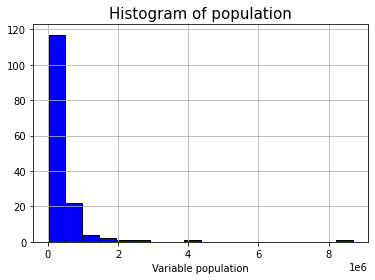

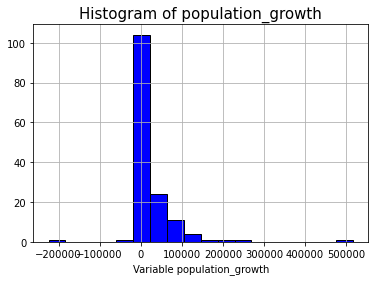

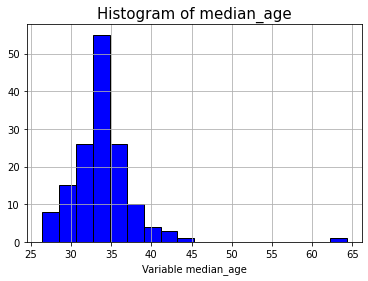

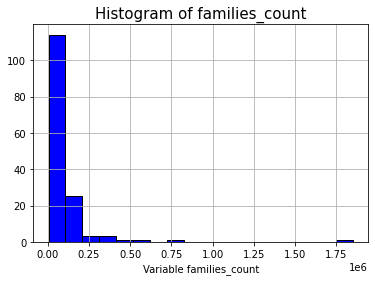

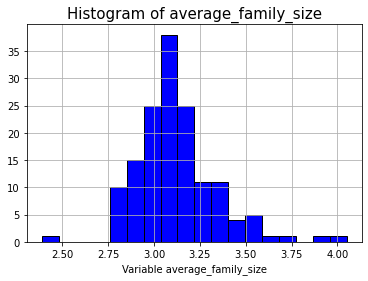

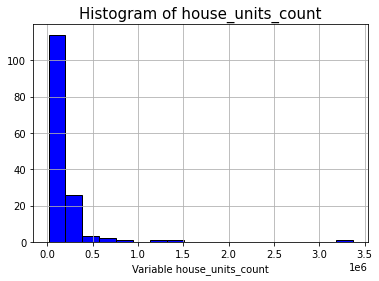

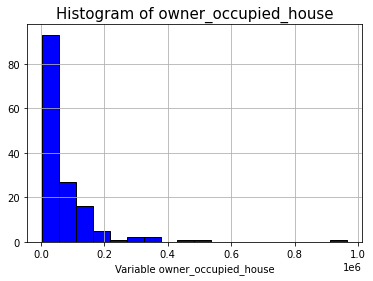

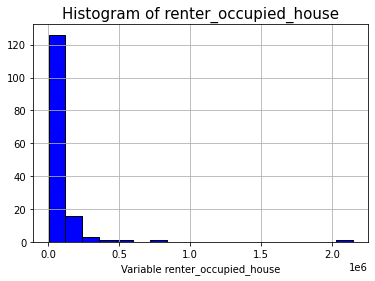

In [543]:
'''
This section of the code will utilize a for loop to plot
all the histograms for the essential columns using the plt.hist() function. 
'''
df_reduced = df_final[['population', 'population_growth', 'median_age', 'families_count', 'average_family_size',
                      'house_units_count', 'owner_occupied_house', 'renter_occupied_house']]

# For loop generation of histogram plot across all columns listed as important above.
for col in df_reduced.columns:
    # Iterate across columns in df_reduced to plot a histogram of each col.
    plt.hist(df_reduced[col], color = 'blue',bins = 18, edgecolor='k') 
    plt.grid(True)
    plt.title("Histogram of {}".format(col), fontsize=15)
    plt.xlabel("Variable " +col, fontsize=10)
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10) 
    plt.show() 

In [544]:
'''
Create a pareto plot function. The basis for this code was found from Tyler Marr's blog and
slightly modified for this application. The site to reference the pareto plot code is:
https://tylermarrs.com/posts/pareto-plot-with-matplotlib/
'''
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)[0:5]
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


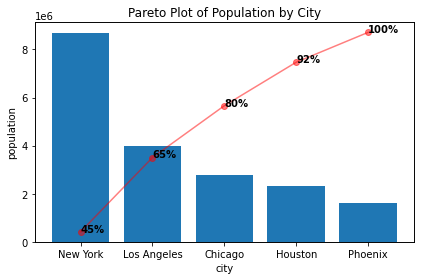

In [545]:
'''
There looked to be an outlier for population growth.
Create a pareto plot of city vs population growth to understand which city is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'population', title = 'Pareto Plot of Population by City')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


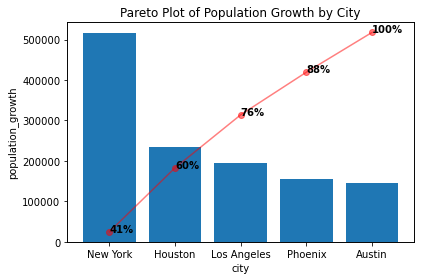

In [546]:
'''
There looked to be an outlier for population growth.
Create a pareto plot of city vs population growth to understand which City is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'population_growth', title = 'Pareto Plot of Population Growth by City')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


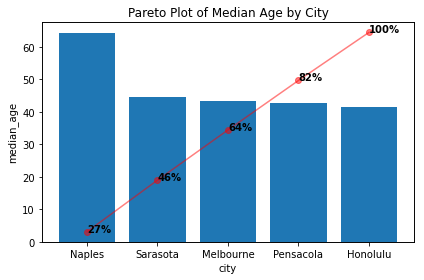

In [547]:
'''
There looked to be an outlier for median age.
Create a pareto plot of city vs median age to understand which City is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'median_age', title = 'Pareto Plot of Median Age by City')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


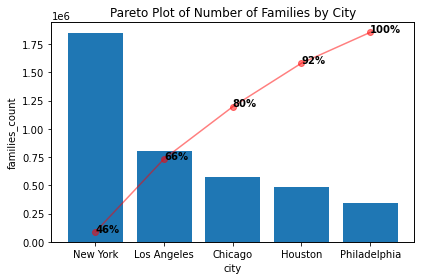

In [548]:
'''
There looked to be an outlier for number of families.
Create a pareto plot of city vs family_count to understand which City is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'families_count', title = 'Pareto Plot of Number of Families by City')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


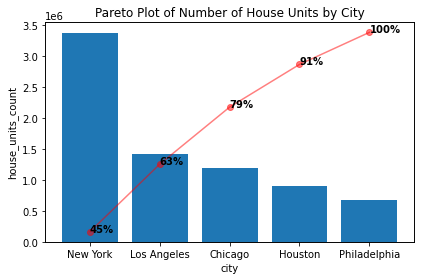

In [549]:
'''
There looked to be an outlier for number of houses.
Create a pareto plot of city vs house count to understand which City is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'house_units_count', title = 'Pareto Plot of Number of House Units by City')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


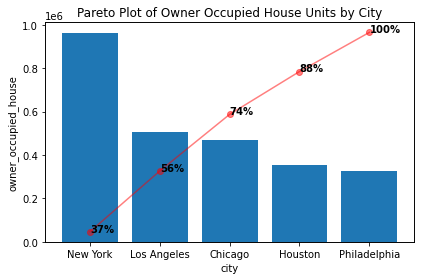

In [550]:
'''
There looked to be an outlier for the number of owner occupied houses.
Create a pareto plot of city vs owner occupied house count to understand which City is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'owner_occupied_house',
            title = 'Pareto Plot of Owner Occupied House Units by City')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_18420/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


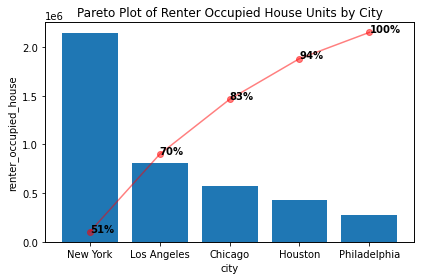

In [551]:
'''
There looked to be an outlier for the number of renter occupied houses.
Create a pareto plot of city vs renter occupied house count to understand which City is way higher. 
The pareto plot will include only the top 5.
'''
pareto_plot(df_final, x = 'city', y = 'renter_occupied_house',
            title = 'Pareto Plot of Renter Occupied House Units by City')

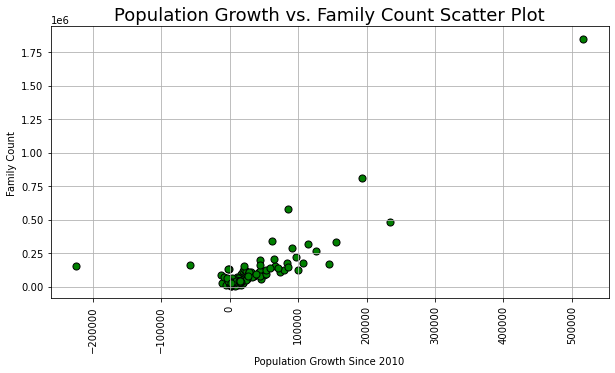

In [552]:
'''
Understand the relationship between population_growth and number of families.
Use plot() to create the chart.
'''
df_final.plot.scatter('population_growth','families_count', s=50, c='green', edgecolor='k', figsize=(10,5))
plt.grid(True)
plt.title("Population Growth vs. Family Count Scatter Plot", fontsize=18)
plt.xlabel("Population Growth Since 2010")
plt.xticks(rotation = 90)
plt.ylabel("Family Count")
plt.show()

No additional data were removed after reviewing the visualization plots (histograms and pareto plots). With the exception of median age, New York appears to stand out on the high side for population, population growth, number of families, number of house units, owner occupied house units, and renter occupied house units.  

In [553]:
'''
Understand the shape of df_final.
'''
print('The shape of the final DataFrame is {} rows and {} columns.'.format(df_final.shape[0],df_final.shape[1]))

The shape of the final DataFrame is 149 rows and 36 columns.


In [554]:
'''
Export df_final to a csv file.
Label the file as Milestone4_df_final.csv
'''
df_final.to_csv('Milestone4_df_final.csv',index=False)

### Milestone 4 Reflection and Ethical Considerations:
Milestone 4 includes a connection to an API to retrieve data for cleaning and transforming steps. The API chosen for this milestone was ArcGIS. Within ArcGIS, the USA Major Cities package was located and utilized to retrieve the data for the final DataFrame. From the command terminal, the "arcgis" module needs to be installed. Once installed, then the "GIS()" command can be utilized to connect to the API. The most challenging part of this milestone was searching through the API documentation to figure out how to make the initial connection. Once connected to GIS, then the additional functions were identified to query and search for the USA Major Cities data. Although this milestone was challenging, the benefits for being able to connect and retreive data from an API are unlimited. Another challenge was handling duplicate city names that were across multiple states. This is one of the reasons why a 'city-state' column was generated to include the full string text for the city with a state abbreviation added to the end. This helped for filtering down the final DataFrame.

The final DataFrame produced within this milestone is intended solely for completion of the Milestone 4 project. Any additional uses for this final DataFrame need to have ethical considerations applied since the data contains some sensitive elements such as race. The cleaning and transformation steps to arrive at the final DataFrame are outlined in the code above for transperancy. Some additional notes are as follows. City names were modified from Milestone 2 CSV file for Boise (Boise City), New York City (New York), Quad Cities (Davenport), Lexington-Fayette (Lexington), Dallas-Fort Worth (Dallas), Gulfport-Biloxi (Gulfport), and Tuscon (Tucson). San Juan data from Puerto Rico was not available on the API data, so there were only 149 cities included in the final DataFrame. The updates were made to ensure the string values for the cities matched between the original list of cities and the city names on the API. Similar to Milestone 3, the pareto code was utilized from Tyler Marr's blog and modified for this project. Lastly, please respect the connection to ArcGIS API. Depending on the authentication used to access the API, a user can create, read, update, and delete. The recommendation is for any additional folks to read through the documentation for the API thoroughly.  